In [4]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load and preprocess the data
# TODO: Load the MNIST dataset and split into train and test sets (use ppt slides as reference)

(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# TODO: Reshape data to include a single channel (for grayscale images) and normalize pixel values to range 0-1

#scaling the image (0-1)
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

#Correcting input shape
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
# TODO: Convert labels to categorical (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [8]:
# Define the CNN model
model = Sequential()

In [9]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.add(MaxPooling2D((2, 2)))

In [11]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

In [12]:
model.add(Flatten())
model.add(Dense(64, activation='relu'))

In [13]:
model.add(Dense(10, activation='softmax'))

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Train the model
# TODO: Train the model with the training data (e.g., 10 epochs, batch size 32)

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 28ms/step - accuracy: 0.5102 - loss: 1.3829 - val_accuracy: 0.8775 - val_loss: 0.3916
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 27ms/step - accuracy: 0.8910 - loss: 0.3535 - val_accuracy: 0.9199 - val_loss: 0.2676
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9185 - loss: 0.2648 - val_accuracy: 0.9415 - val_loss: 0.1963
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 27ms/step - accuracy: 0.9418 - loss: 0.1983 - val_accuracy: 0.9558 - val_loss: 0.1539
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 29ms/step - accuracy: 0.9543 - loss: 0.1561 - val_accuracy: 0.9565 - val_loss: 0.1364
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.9621 - loss: 0.1272 - val_accuracy: 0.9670 - val_loss: 0.1089
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9658 - loss: 0.1109 - val_accuracy: 0.9680 - val_loss: 0.1031
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.9695 -

In [16]:
# TODO: Evaluate the model on the test set and print the accuracy
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 2s - 7ms/step - accuracy: 0.9786 - loss: 0.0740
Test accuracy: 0.978600025177002


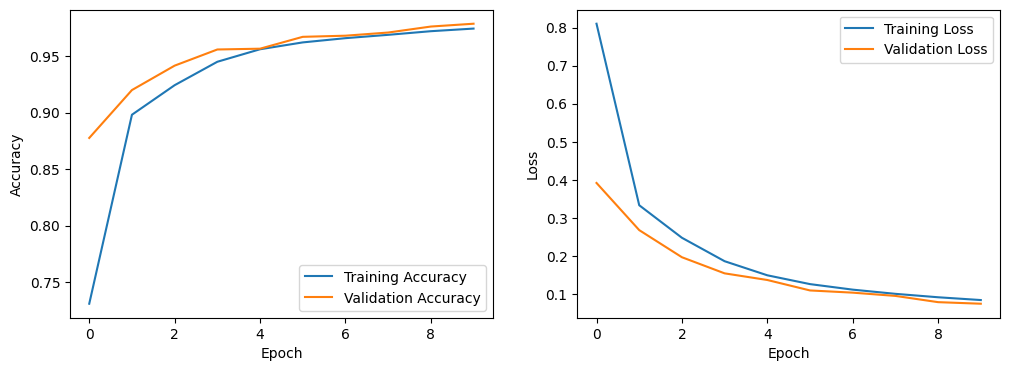

In [18]:
# TODO: Plot accuracy and loss curves for training and validation

# Plot accuracy and loss curves for training and validation
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()